AWS Shared Responsibility Model

    • Responsabilidade da AWS - Segurança da Nuvem
    • Proteção da infraestrutura (hardware, software, instalações e redes) que executa
    todos os serviços da AWS
    • Serviços gerenciados como S3, DynamoDB, RDS, etc.
    • Responsabilidade do cliente - Segurança na Nuvem
    • Para instâncias EC2, o cliente é responsável pelo gerenciamento do sistema operacional convidado
    (incluindo patches de segurança e atualizações), configuração de firewall e rede, IAM
    • Criptografando dados da aplicação
    • Controles compartilhados:
    • Gerenciamento de patches, Gerenciamento de configuração, Conscientização e Treinamento

Example, for RDS

    • Responsabilidade da AWS:

        • Gerenciar a instância EC2 subjacente, desabilitar o acesso SSH
        • Atualização automatizada do banco de dados
        • Atualização automatizada do sistema operacional
        • Auditar a instância e discos subjacentes e garantir seu funcionamento

    • Sua responsabilidade:

        • Verificar as regras de entrada de portas/IP/grupo de segurança no SG do banco de dados
        • Criação de usuário e permissões no banco de dados
        • Criar um banco de dados com ou sem acesso público
        • Garantir que os grupos de parâmetros ou o banco de dados estejam configurados para permitir apenas conexões SSL
        • Configuração de criptografia do banco de dados

Example, for S3

    • Responsabilidade da AWS:
    • Garantir que você obtenha armazenamento ilimitado
    • Garantir que você obtenha criptografia
    • Garantir a separação dos dados entre diferentes clientes
    • Garantir que os funcionários da AWS não possam acessar seus dados
    • Sua responsabilidade:
    • Configuração do bucket
    • Política do bucket / configuração pública
    • Usuário IAM e funções
    • Habilitar criptografia

Shared Responsibility Model diagram    

link: https://aws.amazon.com/pt/compliance/shared-responsibility-model/

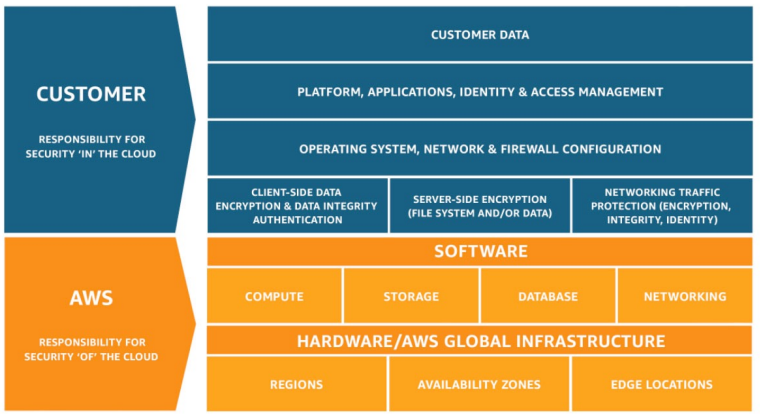

What’s a DDOS* Attack?

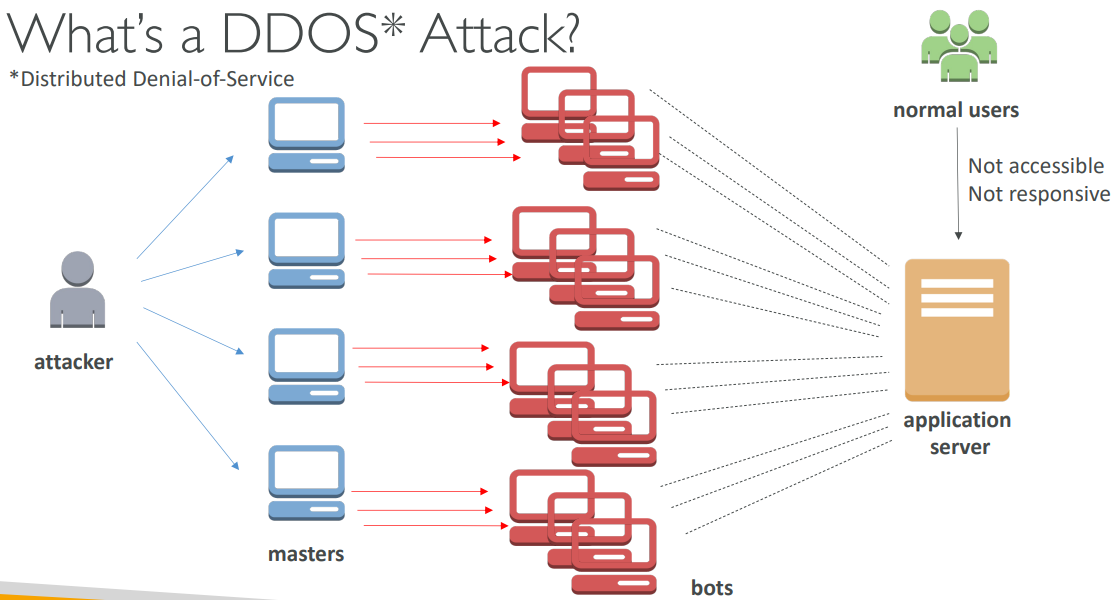

DDOS Protection on AWS

    • AWS Shield Standard: protege contra ataques de negação de serviço distribuído (DDoS) para seu website e aplicações, para todos os clientes sem custos adicionais

    • AWS Shield Advanced: proteção DDoS premium 24/7

    • AWS WAF: Filtra solicitações específicas com base em regras

    • CloudFront e Route 53:
        • Proteção de disponibilidade usando rede global de borda
        • Combinado com AWS Shield, fornece mitigação de ataques na borda

    • Esteja pronto para escalar - aproveite o AWS Auto Scaling

Sample Reference Architecture for DDoS Protection

Link: https://d1.awsstatic.com/whitepapers/Security/DDoS_White_Paper.pdf

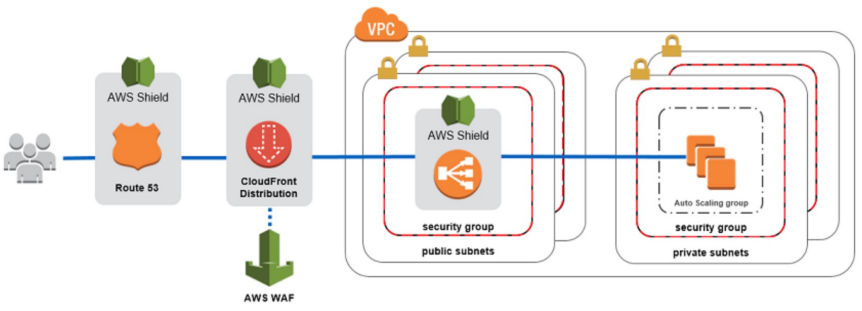

AWS Shield

    AWS Shield Standard:
    
        • Free service that is activated for every AWS customer
        • Provides protection from attacks such as SYN/UDP Floods, Reflection attacks
        and other layer 3/layer 4 attacks

    • AWS Shield Advanced:

        • Optional DDoS mitigation service ($3,000 per month per organization)
        • Protect against more sophisticated attack on Amazon EC2, Elastic Load
        Balancing (ELB), Amazon CloudFront, AWS Global Accelerator, and Route 53
        • 24/7 access to AWS DDoS response team (DRP)
        • Protect against higher fees during usage spikes due to DDoS

AWS WAF – Web Application Firewall      

    • Protects your web applications from common web exploits (Layer 7)

    • Layer 7 is HTTP (vs Layer 4 is TCP)

    • Deploy on Application Load Balancer, API Gateway, CloudFront

    • Define Web ACL (Web Access Control List):

        • Rules can include IP addresses, HTTP headers, HTTP body, or URI strings
        • Protects from common attack - SQL injection and Cross-Site Scripting (XSS)
        • Size constraints, geo-match (block countries)
        • Rate-based rules (to count occurrences of events) – for DDoS protection

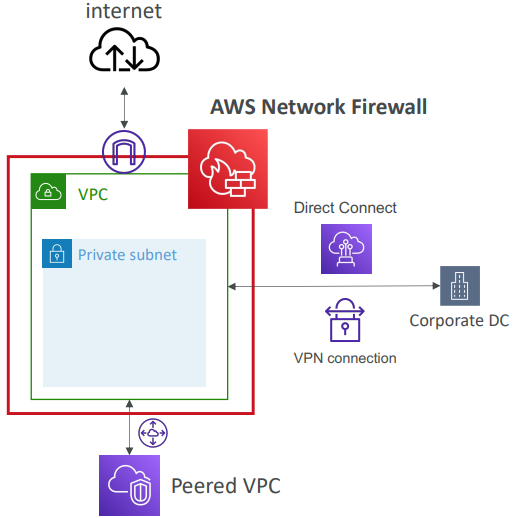

AWS Firewall Manager

    • Manage security rules in all accounts of an AWS Organization

    • Security policy: common set of security rules
        • VPC Security Groups for EC2, Application Load Balancer, etc…
        • WAF rules
        • AWS Shield Advanced
        • AWS Network Firewall

    • Rules are applied to new resources as they are created (good for compliance) across all and future accounts in your Organization

Penetration Testing on AWS Cloud

    • AWS customers are welcome to carry out security assessments or
    penetration tests against their AWS infrastructure without prior approval for 8 services:
        • Amazon EC2 instances, NAT Gateways, and Elastic Load Balancers
        • Amazon RDS
        • Amazon CloudFront
        • Amazon Aurora
        • Amazon API Gateways
        • AWS Lambda and Lambda Edge functions
        • Amazon Lightsail resources
        • Amazon Elastic Beanstalk environments
        • List can increase over time (you won’t be tested on that at the exam)

    • Prohibited Activities
        • DNS zone walking via Amazon Route 53 Hosted Zones
        • Denial of Service (DoS), Distributed Denial of Service (DDoS), Simulated DoS,
        Simulated DDoS
        • Port flooding
        • Protocol flooding
        • Request flooding (login request flooding, API request flooding)

    • For any other simulated events, contact aws-security-simulatedevent@amazon.com

    • Read more: https://aws.amazon.com/security/penetration-testing/

Data at rest vs. Data in transit

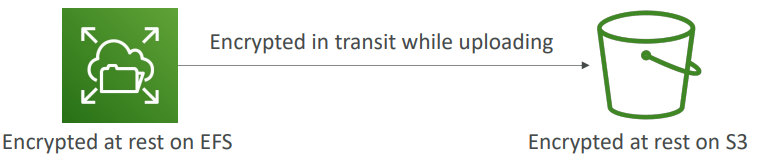

    • Em repouso: dados armazenados ou arquivados em um dispositivo
    • Em um disco rígido, em uma instância RDS, no S3 Glacier Deep Archive, etc.
    • Em trânsito (em movimento): dados sendo movidos de uma localização para outra
    • Transferência de local on-premises para AWS, de EC2 para DynamoDB, etc.
    • Significa dados transferidos na rede
    • Queremos criptografar dados em ambos os estados para protegê-los!
    • Para isso, utilizamos chaves de criptografia

AWS KMS (Key Management Service)

    • Sempre que ouvir "criptografia" para um serviço da AWS, é muito provável que seja o KMS
    • KMS = AWS gerencia as chaves de criptografia para nós
    • Criptografia por opção:
    • Volumes EBS: criptografar volumes
    • Buckets S3: Criptografia do lado do servidor de objetos
    • Banco de dados Redshift: criptografia de dados
    • Banco de dados RDS: criptografia de dados
    • Unidades EFS: criptografia de dados
    • Criptografia automaticamente ativada:
    • Logs do CloudTrail
    • S3 Glacier
    • Gateway de armazenamento

CloudHSM

    • KMS => AWS manages the software for encryption
    • CloudHSM => AWS provisions encryption hardware
    • Dedicated Hardware (HSM = Hardware Security Module)
    • You manage your own encryption keys entirely (not AWS)
    • HSM device is tamper resistant, FIPS 140 -2 Level 3 compliance

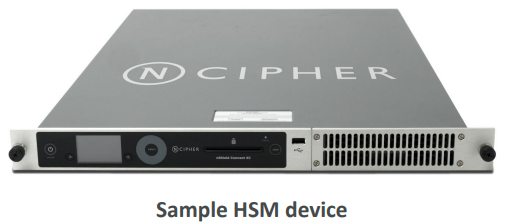
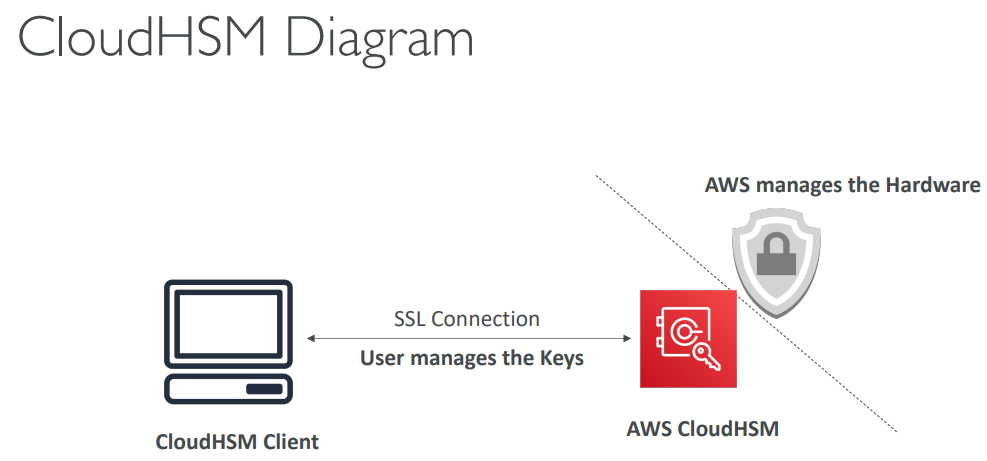

Types of KMS Keys

    • Customer Managed Key:
        • Criada, gerenciada e utilizada pelo cliente, pode ser ativada ou desativada
        • Possibilidade de política de rotação (nova chave gerada a cada ano, chave antiga preservada)
        • Possibilidade de trazer sua própria chave

    • AWS Managed Key:
        • Criada, gerenciada e utilizada em nome do cliente pela AWS
        • Utilizada por serviços da AWS (aws/s3, aws/ebs, aws/redshift)
        
    • AWS Owned Key:
        • Coleção de CMKs (Customer Master Keys) que um serviço da AWS possui e gerencia para uso em várias contas
        • A AWS pode utilizar essas chaves para proteger recursos em sua conta (mas você não pode visualizar as chaves)

    • CloudHSM Keys (custom keystore):
        • Chaves geradas a partir do seu próprio dispositivo de hardware CloudHSM
        • As operações criptográficas são realizadas dentro do cluster CloudHSM

AWS Certificate Manager (ACM)

    • Permite a fácil provisionamento, gerenciamento e implantação de Certificados SSL/TLS
    • Usado para fornecer criptografia em trânsito para websites (HTTPS)
    • Suporta tanto certificados TLS públicos quanto privados
    • Gratuito para certificados TLS públicos
    • Renovação automática de certificados TLS
    • Integrações com (carregar certificados TLS em)
        • Balanceadores de Carga Elástica
        • Distribuições do CloudFront
        • APIs no Gateway de API

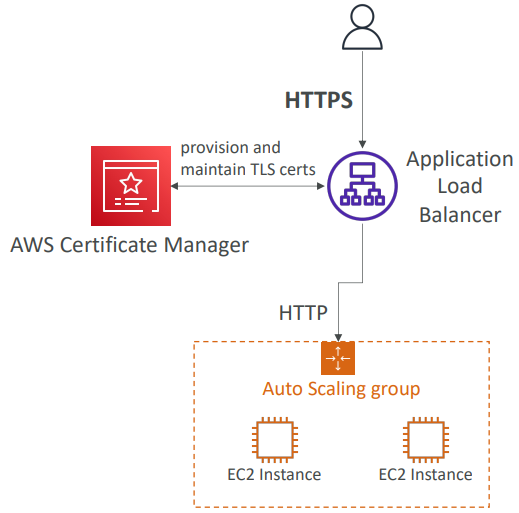

AWS Secrets Manager

    • Serviço mais recente, destinado ao armazenamento de segredos
    • Capacidade de forçar a rotação de segredos a cada X dias
    • Automação na geração de segredos durante a rotação (utiliza o Lambda)
    • Integração com Amazon RDS (MySQL, PostgreSQL, Aurora)
    • Segredos são criptografados usando o KMS
    • Principalmente destinado à integração com o RDS

AWS Artifact (not really a service)

    • Portal que fornece aos clientes acesso sob demanda à documentação de conformidade da AWS e aos acordos da AWS
    • Relatórios de Artefatos - Permite baixar documentos de segurança e conformidade da AWS de auditores terceirizados, como certificações ISO da AWS, Indústria de Cartões de Pagamento (PCI) e relatórios de Controle de Sistema e Organização (SOC)
    • Acordos de Artefatos - Permite revisar, aceitar e rastrear o status de acordos da AWS, como o Adendo de Associado de Negócios (BAA) ou a Lei de Portabilidade e Responsabilidade de Seguro de Saúde (HIPAA) para uma conta individual ou em sua organização
    • Pode ser usado para apoiar auditoria interna ou conformidade

Amazon GuardDuty

    • Descoberta de Ameaças Inteligente para Proteger sua Conta AWS
    • Usa algoritmos de Aprendizado de Máquina, detecção de anomalias, dados de terceiros
    • Um clique para habilitar (30 dias de teste gratuito), não é necessário instalar software
    • Os dados de entrada incluem:
    • Registros de Eventos do CloudTrail - chamadas de API incomuns, implantações não autorizadas
    • Eventos de Gerenciamento do CloudTrail - criar sub-rede VPC, criar trilha, ...
    • Eventos de Dados do S3 do CloudTrail - obter objeto, listar objetos, excluir objeto, ...
    • Registros de Fluxo VPC - tráfego interno incomum, endereço IP incomum
    • Registros de DNS - instâncias EC2 comprometidas enviando dados codificados dentro de consultas DNS
    • Recursos Opcionais - Registros de Auditoria do EKS, RDS e Aurora, EBS, Lambda, Eventos de Dados do S3...
    • Pode configurar regras do EventBridge para ser notificado em caso de descobertas
    • As regras do EventBridge podem direcionar para o AWS Lambda ou SNS
    • Pode proteger contra ataques de criptomoedas (tem uma "descoberta" dedicada para isso)

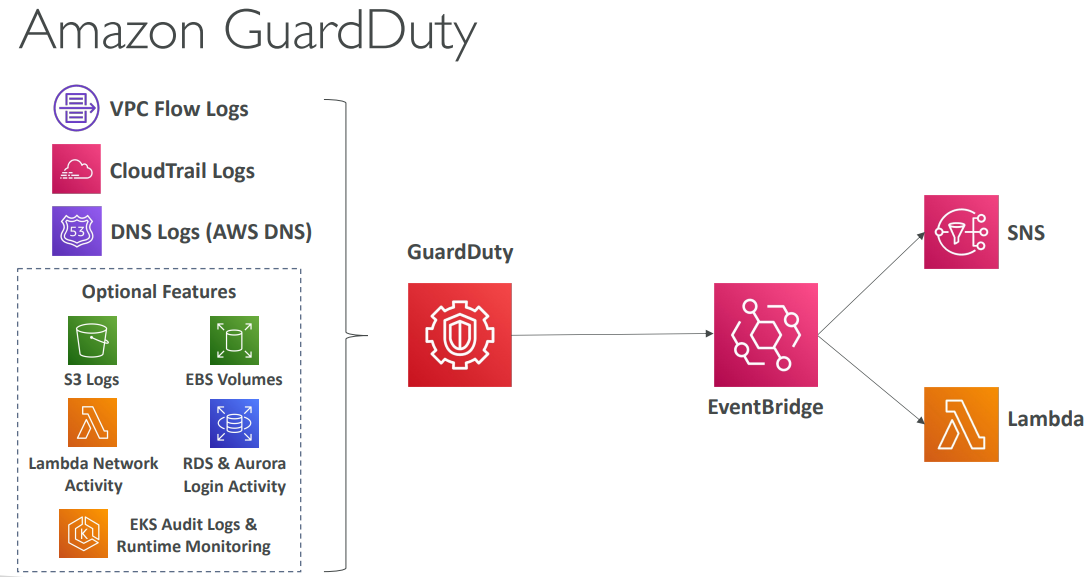






















































































































































































































